#  Закрепление знаний

--------

⭐ Настало время попробовать свои силы в настоящей Data Science задаче с Kaggle.

Вам представлены данные об оттоке клиентов некоторого банка.

In [1]:
# importing the required library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# read a churn.csv file
# from pandas library
churn_data = pd.read_csv('churn.csv')
# create a copy churn_data
churn_df = churn_data.copy()
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Столбцы таблицы:

1. RowNumber — номер строки таблицы;
2. CustomerId — идентификатор клиента;
3. Surname — фамилия клиента;
4. CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их);
5. Geography — страна клиента (банк международный);
6. Gender — пол клиента;
7. Age — возраст клиента;
8. Tenure — сколько лет клиент пользуется услугами банка;
9. Balance — баланс на счетах клиента в банке;
10. NumOfProducts — количество услуг банка, которые приобрёл клиент;
11. HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет);
12. IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет);
13. EstimatedSalary — предполагаемая заработная плата клиента;
14. Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент).

Итак, банк обращается к вам за помощью: он хочет разработать кампанию лояльности по удержанию клиентов, но для этого ему необходимо, чтобы вы выяснили основные причины оттока клиентов. Иными словами, нужно установить, чем ушедшие клиенты отличаются от лояльных и как между собой связаны различные признаки, определяющие клиентов.

После разведывательного анализа, с целью выявления наиболее важных признаков оттока, банк сможет построить модель машинного обучения, которая будет прогнозировать уход клиента.

In [3]:
# adding new columns that reflect
# the required options in the text view
churn_df.loc[churn_data['Exited'] == 1, 'Loyal'] = 'Not loyal'
churn_df.loc[churn_data['Exited'] == 0, 'Loyal'] = 'Loyal'
churn_df.loc[churn_data['IsActiveMember'] == 1, 'Status'] = 'Active'
churn_df.loc[churn_data['IsActiveMember'] == 0, 'Status'] = 'Inactive'
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Loyal,Status
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Not loyal,Active
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Loyal,Active
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Not loyal,Inactive
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Loyal,Inactive
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Loyal,Active


Добавлены новые столбцы в таблицу, для более удобного представления необходимой информации:

1. RowNumber — номер строки таблицы;
2. CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их);
3. Geography — страна клиента (банк международный);
4. Gender — пол клиента;
5. Age — возраст клиента;
6. Tenure — сколько лет клиент пользуется услугами банка;
7. Balance — баланс на счетах клиента в банке;
8. NumOfProducts — количество услуг банка, которые приобрёл клиент;
9. IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет);
10. EstimatedSalary — предполагаемая заработная плата клиента;
11. Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент);
12. Loyal - статус лояльности;
13. Status - статус активного клиента.

Произведем удаление незадействованных столбцов таблицы:

1. CustomerId — идентификатор клиента;
2. Surname — фамилия клиента;
3. HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет).

In [4]:
churn_df = churn_df.drop(['CustomerId', 'Surname', 'HasCrCard'], axis=1)
churn_df.head()

,RowNumber,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,IsActiveMember,EstimatedSalary,Exited,Loyal,Status
0,1,619,France,Female,42,2,0.00,1,1,101348.88,1,Not loyal,Active
1,2,608,Spain,Female,41,1,83807.86,1,1,112542.58,0,Loyal,Active
2,3,502,France,Female,42,8,159660.80,3,0,113931.57,1,Not loyal,Inactive
3,4,699,France,Female,39,1,0.00,2,0,93826.63,0,Loyal,Inactive
4,5,850,Spain,Female,43,2,125510.82,1,1,79084.10,0,Loyal,Active


## Задание 9.1

-----------

Каково соотношение ушедших и лояльных клиентов?

Покажите это на графике и дайте комментарий по соотношению.

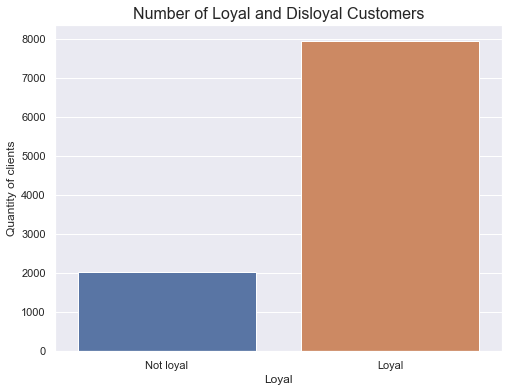

In [5]:
# chart size and
# display style
plt.figure(figsize=(8, 6))
sns.set_theme(style="darkgrid")
# loyal/lost customer ratio
# using a bar chart comparison
ax = sns.countplot(
    data=churn_df, # DataFrame
    x='Loyal'
)
# axle marking
ax.set_ylabel('Quantity of clients')
ax.set_title('Number of Loyal and Disloyal Customers', fontsize=16)
# display graph
plt.show()


Количество лояльных клиентов практически в 4 раза больше, чем ушедших. Позитивный показатель, который говорит об отсутсвии массового оттока клиентов.

##  Задание 9.2

----------

Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

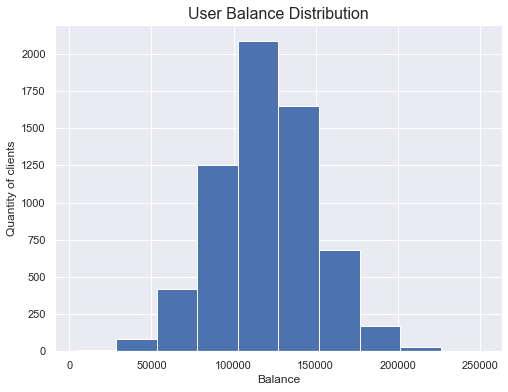

In [6]:
# filtered customers due to balance
# according to the condition
mask = churn_df.Balance > 2500
churn_df_mask = churn_df[mask]
# building the distribution of the user's balance
# using the histogram method
bx = churn_df_mask['Balance'].plot(
    kind='hist',
    grid=True,
    figsize=(8, 6),
    style="darkgrid",
    )
# axle marking
bx.set_xlabel('Balance')
bx.set_ylabel('Quantity of clients')
bx.set_title('User Balance Distribution', fontsize=16)
# display graph
plt.show()


Основная часть пользователей сосредоточена в интервале от 50 до 170 тысяч, а наибольшее число клиентов сосредоточено в интервале от 70 до 150 тысяч. Самый высокий прямоугольник расположен в отметке баланса равной 120 тысячам. Далее при увеличении баланса количество пользователей только падает, что говорит нам о том, что в банке обслуживается преимущественно клиенты среднего класса, ввиду наличия одного вклада более 250 тысяч и незначительного количества клиентов с балансом более 200 тысяч, но менее 250 тысяч. Соответственно при разработке программы лояльности, необходимо учитывать чувствительность клиентов к ценовым предложениям по обслуживанию счета и программе лояльности, в основном сосредоточенной в среднем ценовом сегменте. По графику можно отметить, что распределение близко к нормальному.

## Задание 9.3

--------

Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

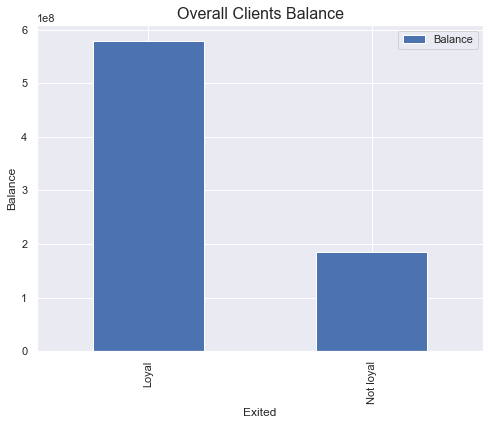

In [16]:
# summation of customer balances and distribution of lost or loyal
balance = churn_df_mask.groupby(['Loyal'])[['Balance']].sum()
# construction of a bar chart by Lost/Loyal balance distribution
cx = balance.plot(
    kind='bar',
    grid=True,
    figsize=(8, 6),
    style="darkgrid"
)
# axle marking
cx.set_xlabel('Exited')
cx.set_ylabel('Balance')
cx.set_title('Overall Clients Balance', fontsize=16)
# display graph
plt.show()


Сумма баланса лояльных пользователей превышает в 3 раза баланс ушедших клиентов. Учитывая разницу в суммах клиентов, можно сказать, что услугами банка пользовались как дополнительными, при этом имея основной счет в другом банке на более выгодных условиях или используя преимущественно наличные деньги.


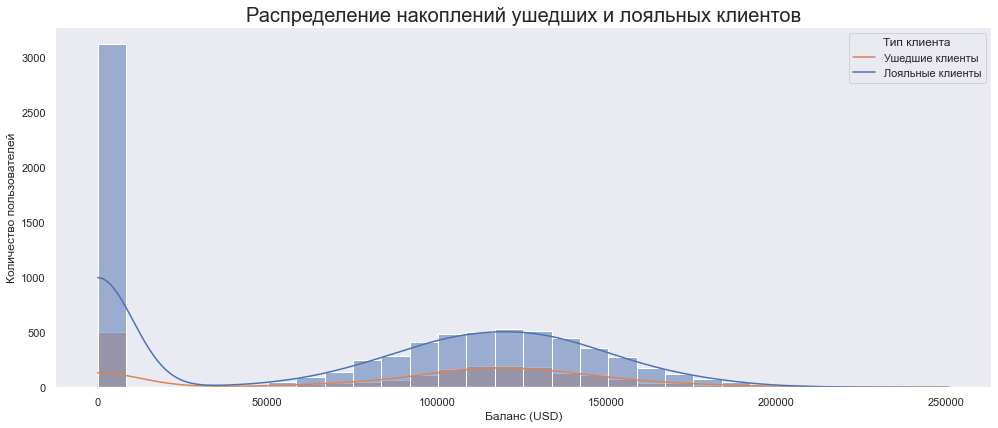

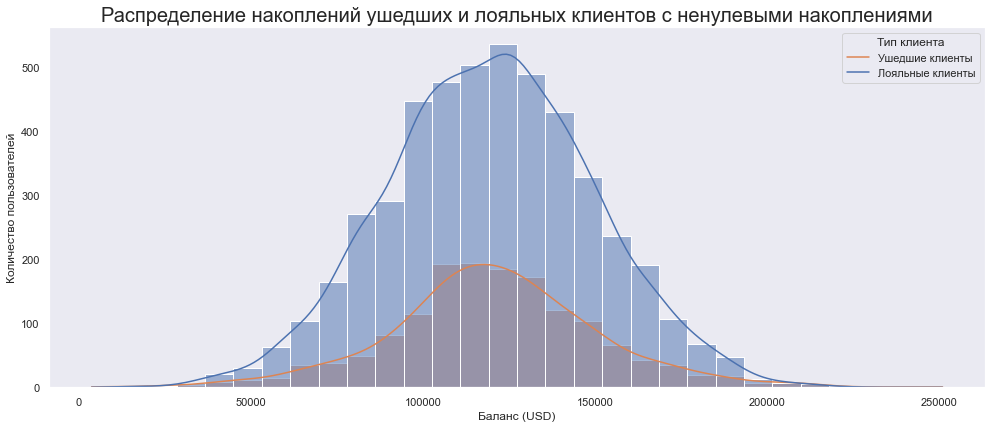

In [17]:
fig = plt.figure(figsize=(13, 5))
axes = fig.add_axes([0, 0, 1, 1])
sns.histplot(
    churn_df,
    x='Balance',
    bins = 30,
    kde = True,
    ax = axes,
    label = ['Лояльные клиенты', 'Ушедшие клиенты'],
    hue = 'Exited'
)
axes.grid()
axes.legend(title='Тип клиента', loc='upper right', labels=['Ушедшие клиенты', 'Лояльные клиенты'])
axes.set_title('Распределение накоплений ушедших и лояльных клиентов', fontsize=20)
axes.set_xlabel('Баланс (USD)')
axes.set_ylabel('Количество пользователей')

fig = plt.figure(figsize=(13, 5))
axes = fig.add_axes([0, 0, 1, 1])
sns.histplot(
    churn_df[churn_data['Balance'] > 0],
    x='Balance',
    bins = 30,
    kde = True,
    ax = axes,
    label = ['Лояльные клиенты', 'Ушедшие клиенты'],
    hue = 'Exited'
)
axes.grid()
axes.legend(title='Тип клиента', loc='upper right', labels=['Ушедшие клиенты', 'Лояльные клиенты'])
axes.set_title('Распределение накоплений ушедших и лояльных клиентов с ненулевыми накоплениями', fontsize=20)
axes.set_xlabel('Баланс (USD)')
axes.set_ylabel('Количество пользователей')
# display graph
plt.show()

Исходя из полученных распределения накоплений лояльных и ушедших клиентов видно, что распределение в обоих случаях нормальное. Это говорит о том, что накопления ушедших и лояльных клинетов примерно одинаковые. Видно так же что ушедших клиентов гораздо меньше чем лояльных. Замечено так же, что самая большая группа клиентов для обоих категорий вообще не имеет накоплений. На втором графике представлено более наглядное распределение балансов, для этого были взяты только те пользователи, на счету которых есть накопления. Сделать выводы о том, что может не устраивать ушедших из банка клиентов по данным распределеняим по моему мнению нельзя. Необходимы дальнейшие исследования.

## Задание 9.4

---------

 Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

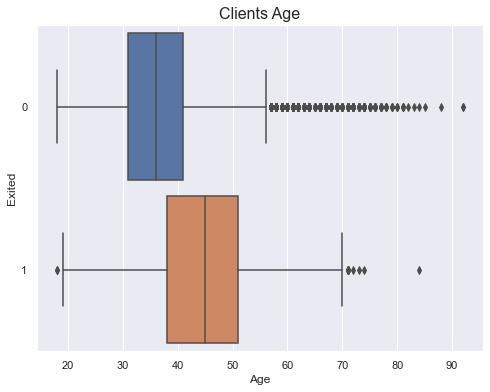

In [18]:
# chart size and
# display style
plt.figure(figsize=(8, 6))
sns.set_theme(style="darkgrid")
# construction of a box plot by exited clients
dx = sns.boxplot(
    data=churn_df,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9,
)
# axle marking
dx.set_title('Clients Age', fontsize=16)
# display graph
plt.show()


Большое количество потенциальных выбросов находится в лояльной группе, причем это клиенты в возрасте от 57 до 92 лет, что говорит нам о незначительном количестве клиентов в возрастной группе от 55 лет и более. Стоит обратить внимание на группу в возрасте от 37 лет до 51 года, так как основная часть клиентов сосредоточена в данном возрасте находится в категории ушедших клиентов. Сравнивая с лояльными клиентами, получаем промежуток от 37 лет до 41 года, где заканчивается ящик с лояльными клиентами и начинается ящик с ушедшими, что говорит об определенном возрастном сдвиге в использовании услуг банка, который можно выразить фразой: "Популярно у молодежи, но не по нраву старшему поколению". Разработка программы лояльности должна быть рассчитана на привлечение возрастной группы от 37 лет до 51 года, для людей использующих преимущественно наличные средства ввиду небольшого баланса на счете в банке.

##  Задание 9.5

-----------

Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

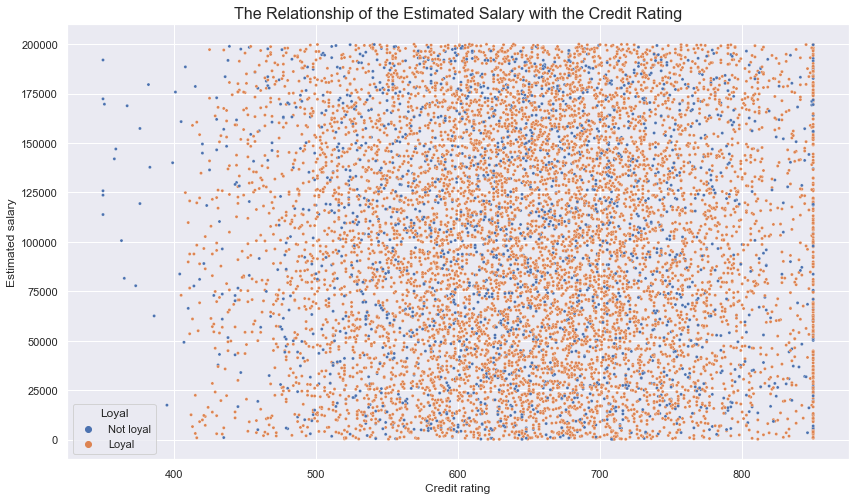

In [23]:
# chart size
fig = plt.figure(figsize=(14, 8))
# building a scatterplot
ex = sns.scatterplot(
    data=churn_df,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Loyal',
    s=10
)
# axle marking
ex.set_title('The Relationship of the '
             'Estimated Salary with the Credit Rating', fontsize=16)
ex.set_xlabel('Credit rating')
ex.set_ylabel('Estimated salary')
# display graph
plt.show()


Чем выше кредитный рейтинг, тем "облако" точек плотнее в концентрации, но к увеличению за 760 кредитного рейтинга заметное снижение концентрации. На предполагаемою заработную плату оказал влияние признак оттока клиентов, так как можно увидеть пробелы в "облаке" точек, но при этом заметна равномерная концентрация от самой низкой до самой высокой заработной платы клиента. В целом наблюдается равномерное распределение точек по секторам, что говорит о заинтерисованности в услугах банка людей как с высокой, так и с низкой заработной платой, увеличение влияния параметра кредитного рейтинга начинается после 500 и завершается до 800, а признак лояльности клиента увеличил пробелы в облаке клиентов.


##  Задание 9.6

------

Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [28]:
# grouping by gender
gender = churn_df.groupby(['Gender'], as_index=False).mean()
# construction of bar charts
px.bar(
    data_frame=gender,
    x='Gender',
    height=400,
    y='Exited',
    width=600,
    title='The Ratio of Departed Men and Women'
)


Не лояльных клиентов женщин на 34,4% больше, чем мужчин.

##  Задание 9.7

------

Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [29]:
# the number of non-blank values in the row_number column in each group
bar_data = churn_df.groupby(['NumOfProducts', 'Loyal'], as_index=False).count()
# construction of layered bar chart
px.bar(
    data_frame=bar_data,
    x='NumOfProducts',
    y='RowNumber',
    color='Loyal',
    height=400,
    width=600,
    title='Number of Purchased Bank Services'
)


Из диаграммы видно, что при наличии 3-х и более услуг у клиента, статус нелояльности к банку увеличивается и превалирует над лояльными клиентами. В категории клиентов, у которых 2-е услуги лояльных больше на 13,4%, чем в категории клиентов, у которых одна услуга, при этом существенное падение на 98,92% в категории 3-х услуг, и на 100% в категории 4-х услуг соответственно. Что говорит о низкой привлекательности банка как экосистемы продуктов, ввиду популярности использования 1-ой или 2-мя услугами из продуктовой линейки банка. Суммарное количество клиентов с одной услугой больше на 9,72% клиентов, чем с двумя услугами банка, но при этом количество не лояльных клиентов значительно больше на 75,3%. Тем самым получается, что самая привлекательная категория клиентов у банка, те кто пользуется двумя услугами, так как самый высокий процент лояльности в аудитории. Необходима программа по увеличению лояльности среди клиентов с одной услугой, для удержания клиентов в банке. И проработка дополнительных услуг, которые не являются привлекательными для аудитории.

##  Задание 9.8

----------

Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [30]:
# the number of non-blank values in the row_number column in each group
activ = churn_df.groupby(['Status', 'Loyal'], as_index=False).count()
# construction of layered bar chart
px.bar(
    data_frame=activ,
    x='Status',
    y='RowNumber',
    color='Loyal',
    height=400,
    width=600,
    title='Active Client Status'
)


Активных клиентов на 5,86% больше, чем не активных, получается что деление просходит примерно пополам. При этом активных, но не лояльных клиентов меньше на 43,54%, чем в категории не активных клиентов, что говорит нам о 83,35% лояльных и активных клиентах, остаток клиентов не является лояльным к банку. Неактивных, но лояльных клиентов в банке 63,3%, остальные не являются активными и лояльными. В группе клиентов, которая не является активной, но при этом лояльна необходимо выявить спект услуг, неиспользуемый клиентом или успользуемый в другом учереждении для привлечения.

##  Задание 9.9

----------

В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [34]:
churn_data = churn_df.groupby(['Geography'] , as_index=False).mean()

fig = px.choropleth(
    data_frame=churn_data,
    locations="Geography",
    locationmode = "country names",
    color="Exited",
    title='Распределение ушедших клиентов по странам',
    width=1000,
    height=500,
    color_continuous_scale="Viridis",
    labels={'Exited':'Ушедшие клиенты'}
)
fig.update_layout(
    title_font_size=20,
)
fig.show()

Из полученного распределения видно, что самая большая доля ушедших клиентов из Германии, примерно половина всех ушедших, вполне возможно отток клиентов связан с изменением условий обслуживания на территории страны.

##  Задание 9.10

--------

Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

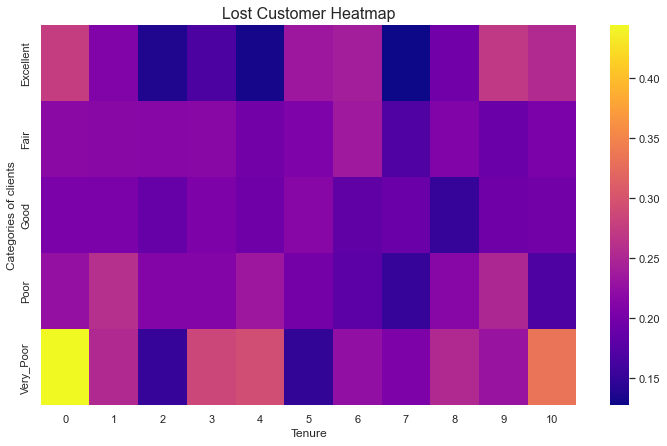

In [109]:
def get_credit_score_cat(credit_score):
    '''function for converting a numerical feature into a categorical one'''
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
# application of a function
credit_score = churn_df['CreditScore'].apply(get_credit_score_cat)
# creating a new column with
# a credit rating category attribute
churn_df['CreditScoreCat'] = credit_score
# building a pivot table
credit_cat = churn_df.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
    aggfunc='mean',
    fill_value=0
)
# chart size
plt.figure(figsize=(12, 7))
# building a heatmap
heatmap = sns.heatmap(data=credit_cat, cmap='plasma')
# axle marking
heatmap.set_ylabel('Сategories of clients')
heatmap.set_title('Lost Customer Heatmap', fontsize=16)
# display graph
plt.show()


Чаще всего — это клиенты с низким рейтингом, которые только начали пользоваться услугами, но по каким-то причинам не понравилось или доверие которых банк не заполучил. По тепловой карте видно, что чем выше категория клиентов, тем меньше потерь среди клиентов, но при этом высокое количество в категории "Превосходно". Так же можно обратить внимание на область использования услугами до 7-ми лет, преобладает холодный оттенок, что говорит о низком оттоке клиентов. В последующем происходит увеличение оттока клиентов, что требует разработки программы лояльности для клиентов с длительным сроком обслуживания.